# GNOD - Clustering

In [1]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from random import randint
from time import sleep
from pandas import json_normalize

# K-means
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [2]:
pd.set_option('display.max_columns', None)
df_data = pd.read_csv('df_data.csv')
df_data.head(2)

artist              song  popularity  \
0  Taylor Swift  ...Ready For It?           0   
1  Thomas Rhett      Life Changes          63   

                                    uri  \
0  spotify:track:7zgqtptZvhf8GEmdsM2vp2   
1  spotify:track:4Vxu50qVrQcycjRyJQaZLC   

                                                 url  \
0  https://open.spotify.com/track/7zgqtptZvhf8GEm...   
1  https://open.spotify.com/track/4Vxu50qVrQcycjR...   

                                      audio_features  danceability  energy  \
0  [{'danceability': 0.615, 'energy': 0.779, 'key...         0.615   0.779   
1  [{'danceability': 0.687, 'energy': 0.845, 'key...         0.687   0.845   

   key  loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
0  2.0    -6.454   1.0       0.1350        0.0665               0.0    0.1550   
1  7.0    -4.370   1.0       0.0576        0.1000               0.0    0.0452   

   valence    tempo            type                      id  \
0    0.453  160.000  audio_features  7zgqtptZvhf8GEmdsM2vp2   
1    0.809   87.972  audio_features  4Vxu50qVrQcycjRyJQaZLC   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/7zgqtptZvhf8...   
1  https://api.spotify.com/v1/tracks/4Vxu50qVrQcy...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/7zgq...     208198.0   
1  https://api.spotify.com/v1/audio-analysis/4Vxu...     190227.0   

   time_signature   0  
0             4.0 NaN  
1             4.0 NaN

In [3]:
df_data = df_data.drop_duplicates(subset=['uri'])

In [4]:
df_data = df_data.drop(['audio_features'], axis = 1)

In [5]:
df_clustering = df_data.drop(['artist', 'song', 'uri', 'url', 'id', 'type','track_href', 'analysis_url'], axis = 1)

In [6]:
df_clustering = df_clustering.drop(['0'], axis = 1)

In [7]:
df_clustering = df_clustering.drop(['popularity'], axis = 1)

In [8]:
df_clustering.describe().T

count           mean            std         min  \
danceability      9944.0       0.567864       0.166132       0.000   
energy            9944.0       0.651672       0.225201       0.000   
key               9944.0       5.226368       3.586343       0.000   
loudness          9944.0      -7.693482       4.440301     -53.436   
mode              9944.0       0.654063       0.475697       0.000   
speechiness       9944.0       0.069472       0.074665       0.000   
acousticness      9944.0       0.238767       0.290991       0.000   
instrumentalness  9944.0       0.099204       0.246092       0.000   
liveness          9944.0       0.185019       0.153860       0.000   
valence           9944.0       0.473125       0.249016       0.000   
tempo             9944.0     120.478207      28.199625       0.000   
duration_ms       9944.0  283073.045052  368702.441034  100172.000   
time_signature    9944.0       3.934634       0.353075       0.000   

                          25%            50%            75%          max  
danceability           0.4670       0.581000       0.686000        0.980  
energy                 0.5100       0.696000       0.829000        1.000  
key                    2.0000       5.000000       8.000000       11.000  
loudness              -9.1590      -6.510500      -4.884000       -0.276  
mode                   0.0000       1.000000       1.000000        1.000  
speechiness            0.0340       0.044050       0.069700        0.957  
acousticness           0.0157       0.096500       0.383000        0.995  
instrumentalness       0.0000       0.000034       0.008955        0.999  
liveness               0.0940       0.122000       0.227000        0.988  
valence                0.2740       0.468000       0.670000        0.990  
tempo                 99.9670     119.972000     138.015500      240.107  
duration_ms       197933.0000  224863.500000  263400.000000  6000661.000  
time_signature         4.0000       4.000000       4.000000        5.000

In [9]:
# Get rid of the mode feature as it is an object and not a numerical number

In [10]:
df_clustering = df_clustering.drop(['mode'], axis = 1)

In [11]:
df_clustering = df_clustering.drop(['key'], axis = 1)

In [12]:
df_clustering.to_csv("df_clustering.csv", index = False)

##### StandardScale the whole model

In [13]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(df_clustering)

# Now, all features will have the same weight.
pd.DataFrame(X_prep,columns=df_clustering.columns).head()


danceability    energy  loudness  speechiness  acousticness  \
0      0.283739  0.565427  0.279158     0.877677     -0.592032   
1      0.717151  0.858514  0.748519    -0.159008     -0.476902   
2      1.505719  0.672004  0.768338     0.136997     -0.703725   
3      0.337916  0.996175  0.972839     0.408892     -0.567975   
4      0.277720 -1.210854 -0.627583    -0.292946      1.265507   

   instrumentalness  liveness   valence     tempo  duration_ms  time_signature  
0         -0.403138 -0.195119 -0.080821  1.401571    -0.203087        0.185143  
1         -0.403138 -0.908790  1.348875 -1.152776    -0.251831        0.185143  
2         -0.403138 -0.208118  0.638043 -0.479045    -0.154848        0.185143  
3         -0.403138  0.922837  1.236427 -0.728245    -0.304451        0.185143  
4         -0.401253 -0.561704 -1.092854 -0.442908    -0.065330        0.185143

#### Choosing k

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

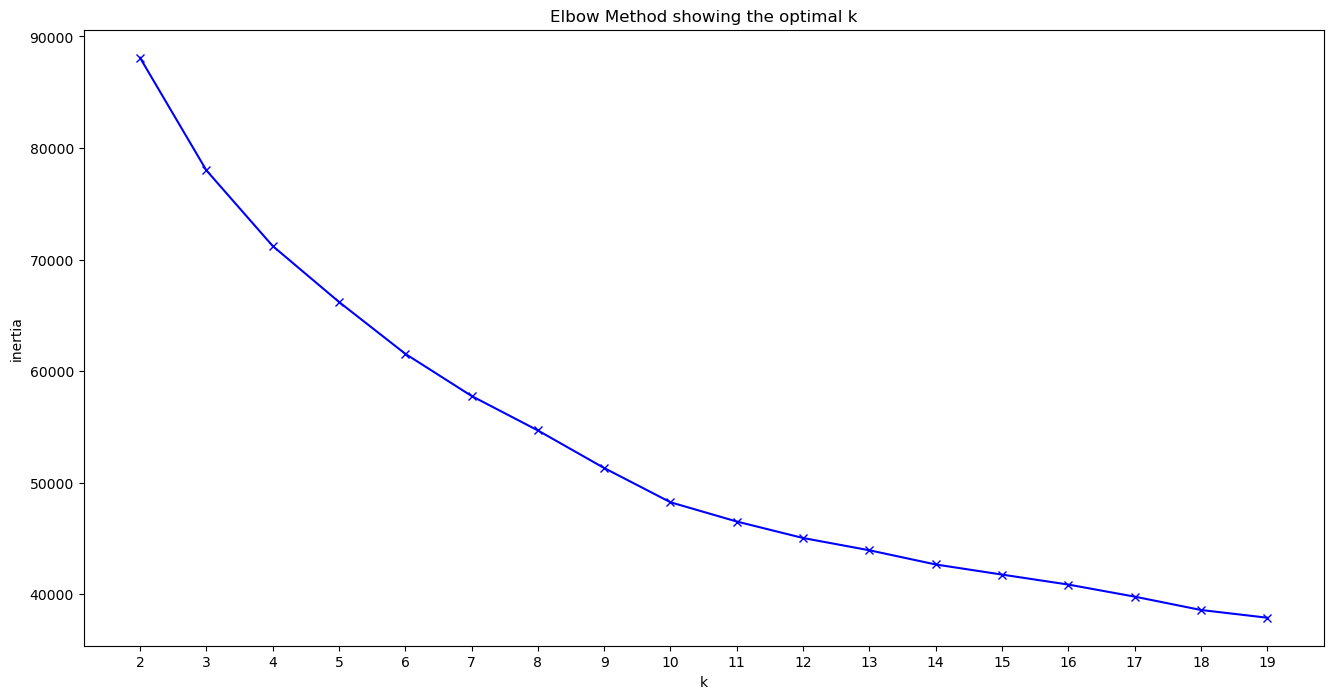

In [14]:
from sklearn.cluster import KMeans
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_) #plot various versions of clusters

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

No clear variation, therefore perform silhouette_score

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

Text(0.5, 1.0, 'Slhouette score showing the optimal k')

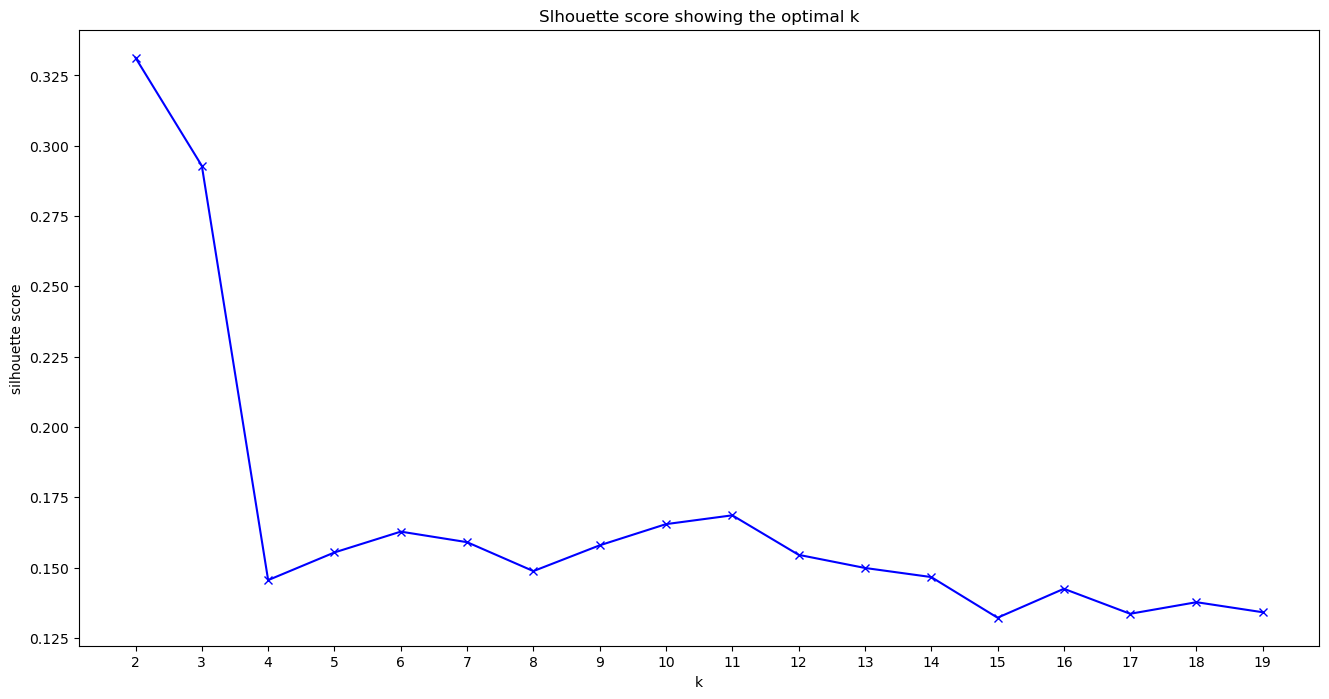

In [15]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [16]:
kmeans = KMeans(n_clusters=10, random_state=1234)
kmeans.fit(X_prep)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=1234)

In [17]:
# Predicting / assigning the clusters:
clusters = kmeans.predict(X_prep)

# Check the size of the clusters
pd.Series(clusters).value_counts().sort_index()

0    1343
1    2055
2     569
3     602
4     352
5      99
6     406
7     468
8    1462
9    2588
dtype: int64

In [18]:
len(clusters)

9944

In [19]:
clusters

array([8, 9, 9, ..., 6, 3, 8], dtype=int32)

In [20]:
df_test = df_data

In [21]:
df_data = df_data.assign(clusters = clusters)
df_data

artist                                               song  \
0       Taylor Swift                                   ...Ready For It?   
1       Thomas Rhett                                       Life Changes   
2         Bruno Mars                                          24K Magic   
3         Ed Sheeran                                        Galway Girl   
4         Ed Sheeran                                         Photograph   
...              ...                                                ...   
9990      Elton John          Funeral For A Friend / Love Lies Bleeding   
9991      Supertramp                                    Fool's Overture   
9992             Yes               Heart of the Sunrise - 2003 Remaster   
9993  Paul McCartney  Venus And Mars / Rock Show / Jet - Live / Rema...   
9994     The Killers                                     Mr. Brightside   

      popularity                                   uri  \
0              0  spotify:track:7zgqtptZvhf8GEmdsM2vp2   
1             63  spotify:track:4Vxu50qVrQcycjRyJQaZLC   
2             81  spotify:track:6b8Be6ljOzmkOmFslEb23P   
3             80  spotify:track:0afhq8XCExXpqazXczTSve   
4             86  spotify:track:1HNkqx9Ahdgi1Ixy2xkKkL   
...          ...                                   ...   
9990           0  spotify:track:4UFlPCB4THnQ9TlPHqIQow   
9991          55  spotify:track:5pSSEkT0963muzzIjsVkrs   
9992          47  spotify:track:7gC6Rbllqf1yXNC02e5jz2   
9993           0  spotify:track:6Ff77WXC58MkhLE5A1qgY1   
9994           0  spotify:track:1is5wwajEk2JW7Nsd63r3m   

                                                    url  danceability  energy  \
0     https://open.spotify.com/track/7zgqtptZvhf8GEm...         0.615   0.779   
1     https://open.spotify.com/track/4Vxu50qVrQcycjR...         0.687   0.845   
2     https://open.spotify.com/track/6b8Be6ljOzmkOmF...         0.818   0.803   
3     https://open.spotify.com/track/0afhq8XCExXpqaz...         0.624   0.876   
4     https://open.spotify.com/track/1HNkqx9Ahdgi1Ix...         0.614   0.379   
...                                                 ...           ...     ...   
9990  https://open.spotify.com/track/4UFlPCB4THnQ9Tl...         0.410   0.761   
9991  https://open.spotify.com/track/5pSSEkT0963muzz...         0.406   0.306   
9992  https://open.spotify.com/track/7gC6Rbllqf1yXNC...         0.362   0.507   
9993  https://open.spotify.com/track/6Ff77WXC58MkhLE...         0.331   0.733   
9994  https://open.spotify.com/track/1is5wwajEk2JW7N...         0.342   0.932   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
0     2.0    -6.454   1.0       0.1350       0.06650          0.000000   
1     7.0    -4.370   1.0       0.0576       0.10000          0.000000   
2     1.0    -4.282   1.0       0.0797       0.03400          0.000000   
3     9.0    -3.374   1.0       0.1000       0.07350          0.000000   
4     4.0   -10.480   1.0       0.0476       0.60700          0.000464   
...   ...       ...   ...          ...           ...               ...   
9990  9.0    -8.507   0.0       0.0465       0.01980          0.084700   
9991  3.0   -10.482   1.0       0.0372       0.31300          0.007900   
9992  1.0   -11.229   1.0       0.0394       0.01740          0.216000   
9993  2.0    -8.671   1.0       0.0468       0.08870          0.001740   
9994  1.0    -3.644   1.0       0.0868       0.00106          0.000000   

      liveness  valence    tempo            type                      id  \
0       0.1550    0.453  160.000  audio_features  7zgqtptZvhf8GEmdsM2vp2   
1       0.0452    0.809   87.972  audio_features  4Vxu50qVrQcycjRyJQaZLC   
2       0.1530    0.632  106.970  audio_features  6b8Be6ljOzmkOmFslEb23P   
3       0.3270    0.781   99.943  audio_features  0afhq8XCExXpqazXczTSve   
4       0.0986    0.201  107.989  audio_features  1HNkqx9Ahdgi1Ixy2xkKkL   
...        ...      ...      ...             ...                     ...   
9990    0.2470    0.19

In [22]:
df_data[df_data['clusters'] == 5]

artist                                            song  \
9772          Nature Sounds                        Audio Water Therapy Lake   
9773          Nature Sounds                         Active Brazilian Jungle   
9774          Nature Sounds                    Crystal Wind Chimes Close Up   
9775          Nature Sounds                      Greenscape Lakeside Forest   
9776          Nature Sounds                           Whale Songs and Waves   
...                     ...                                             ...   
9934  Meditation Zen Master   Brazilian Jungle at Dusk for Healing Strength   
9935  Meditation Zen Master  Evening Jungle Ambience for Yoga Concentration   
9936  Meditation Zen Master                Shady Forest on a Hot Summer Day   
9937  Meditation Zen Master     Tranquil Brook Flows Toward Deep Meditation   
9938  Meditation Zen Master               Calm Seaside Surf Deep Relaxation   

      popularity                                   uri  \
9772           2  spotify:track:6j0gXMwlKpqg7D76Fr7Nl2   
9773           0  spotify:track:3vooQ8LMycos1H5efHSlgk   
9774           0  spotify:track:0ptEQUkWsHvXyWZdEidlbR   
9775           5  spotify:track:4gk8NuKsTilea9iXLE79KS   
9776           1  spotify:track:7cv8Ltfh2YvBG2zs7hoEBp   
...          ...                                   ...   
9934           1  spotify:track:1wn86XUwzmgmWlUQXTV9i8   
9935           0  spotify:track:1evG4A0KMEWS6nLkaDs5oC   
9936           1  spotify:track:7JJdzIISEBetihuMF0HUQ4   
9937           1  spotify:track:6W0n0qR0sP5W4vq0HyfUNV   
9938           0  spotify:track:4vb6sp8bvVUfrB89xLXbDw   

                                                    url  danceability  energy  \
9772  https://open.spotify.com/track/6j0gXMwlKpqg7D7...        0.0778   1.000   
9773  https://open.spotify.com/track/3vooQ8LMycos1H5...        0.0697   0.434   
9774  https://open.spotify.com/track/0ptEQUkWsHvXyWZ...        0.2790   0.187   
9775  https://open.spotify.com/track/4gk8NuKsTilea9i...        0.2480   0.979   
9776  https://open.spotify.com/track/7cv8Ltfh2YvBG2z...        0.0817   0.977   
...                                                 ...           ...     ...   
9934  https://open.spotify.com/track/1wn86XUwzmgmWlU...        0.1510   0.373   
9935  https://open.spotify.com/track/1evG4A0KMEWS6nL...        0.4250   0.908   
9936  https://open.spotify.com/track/7JJdzIISEBetihu...        0.3560   0.673   
9937  https://open.spotify.com/track/6W0n0qR0sP5W4vq...        0.3250   0.995   
9938  https://open.spotify.com/track/4vb6sp8bvVUfrB8...        0.1520   0.977   

       key  loudness  mode  speechiness  acousticness  instrumentalness  \
9772   0.0   -13.305   1.0       0.0646         0.811             0.988   
9773   0.0   -18.168   1.0       0.0455         0.981             0.777   
9774   5.0   -18.129   1.0       0.0344         0.986             0.952   
9775   1.0   -28.076   1.0       0.8520         0.871             0.946   
9776  11.0   -18.267   0.0       0.0611         0.459             0.256   
...    ...       ...   ...          ...           ...               ...   
9934   1.0   -22.727   1.0       0.0492         0.453             0.791   
9935   1.0   -27.979   1.0       0.7280         0.950             0.411   
9936   0.0   -30.322   0.0       0.5350         0.637             0.910   
9937   8.0   -17.600   1.0       0.9050         0.855             0.910   
9938   1.0   -18.599   1.0       0.0758         0.802             0.978   

      liveness  valence    tempo            type                      id  \
9772    0.9460  0.00001   83.095  audio_features  6j0gXMwlKpqg7D76Fr7Nl2   
9773    0.0858  0.02470   77.931  audio_features  3vooQ8LMycos1H5efHSlgk   
9774    0.2500  0.14300  135.106  audio_features  0ptEQUkWsHvXyWZdEidlbR   
9775    0.9340  0.00989   74.220  audio_features  4gk8NuKsTilea9iXLE79KS   
9776    0.4350  0.00497   81.891  audio_features  7cv8Ltfh2YvBG2zs7hoEBp   
...        ...      ...      ...             

In [23]:
df_data.shape

(9944, 24)

In [24]:
df_data.to_csv("df_recommender.csv", index = False)